In [47]:
# code from https://stackoverflow.com/questions/66896138/python-numpy-insert-2d-array-into-bigger-2d-array-on-given-posiiton user: Elmahy
import numpy as np

big = np.zeros((4, 4))

to_insert_arr = np.array([
    [1, 2],
    [3, 4]
])

def insert_at(big_arr, pos, to_insert_arr):
    x1 = pos[0]
    y1 = pos[1]
    x2 = x1 + to_insert_arr.shape[0]
    y2 = y1 + to_insert_arr.shape[1]

    assert x2  <= big.shape[0], "the position will make the small matrix exceed the boundaries at x"
    assert y2  <= big.shape[1], "the position will make the small matrix exceed the boundaries at y"

    big[x1:x2,y1:y2] = to_insert_arr

    return big
    


result = insert_at(big, (0, 0), to_insert_arr)
result

array([[1., 2., 0., 0.],
       [3., 4., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [48]:
import numpy as np

In [49]:
def move_tetromino(board, pos, tetromino):
    """Inserts tetromino in copy of board at pos"""
    x1 = pos[0]
    y1 = pos[1]
    x2 = x1 + tetromino.shape[0]
    y2 = y1 + tetromino.shape[1]

    assert x2  <= board.shape[0], "the position will make the small matrix exceed the boundaries at x"
    assert y2  <= board.shape[1], "the position will make the small matrix exceed the boundaries at y"

    new_board = np.array(board) # needs to be array() to point to different location
    new_board[x1:x2,y1:y2] = tetromino

    return new_board # returns new board, TODO: update board = new board when tetromino is locked in place

In [50]:
board = np.zeros((20, 10))                      # board (10x20 ((20x10)))
square = np.ones((2, 2))                        # Square-shape
line = np.ones((4, 1))                          # Line-shape
T, T[1, 0], T[1, 2] = np.ones((2, 3)), 0, 0     # T-shape
L1, L1[0:2, 1] = np.ones((3, 2)), 0             # L-shape one
L2, L2[0:2, 0] = np.ones((3, 2)), 0             # L-shape two
Z1, Z1[0, 0], Z1[1, 2] = np.ones((2, 3)), 0, 0  # Z-shape one
Z2, Z2[1, 0], Z2[0, 2] = np.ones((2, 3)), 0, 0  # Z-shape two

position = (0, 4)

In [51]:
board = np.zeros((5, 10))

temp_board = move_tetromino(board, position, square)
print(temp_board, "\n")

temp_board = move_tetromino(board, position, line)
print(temp_board)

[[0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


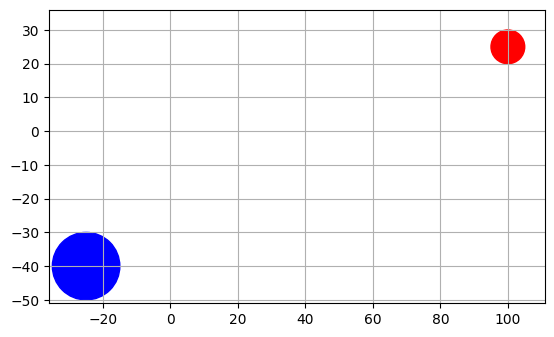

In [52]:
import matplotlib.pyplot as plt

# circle 1
x1 = 100
y1 = 25
r1 = 5

# circle 2
x2 = -25
y2 = -40
r2 = 10

xmin = min(x1, x2) - max(r1, r2) - 1
xmax = max(x1, x2) + max(r1, r2) + 1

ymin = min(y1, y2) - max(r1, r2) - 1
ymax = max(y1, y2) + max(r1, r2) + 1 

circle1 = plt.Circle((x1, y1), r1, color='r')
circle2 = plt.Circle((x2, y2), r2, color='b')

fig, ax = plt.subplots()
ax.set_aspect(1)

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.grid(visible = True, which = 'major') # NOTE way to plot lines exactly on center point of shapes?

ax.add_patch(circle1)
ax.add_patch(circle2);

In [53]:
class Circle:
    def __init__(self, r, x, y) -> None:
        self.r = r
        self.x = x
        self.y = y

class Rectangle:
    def __init__(self, w, h, x, y) -> None:
        self.w = w
        self.h = h
        self.x = x
        self.y = y

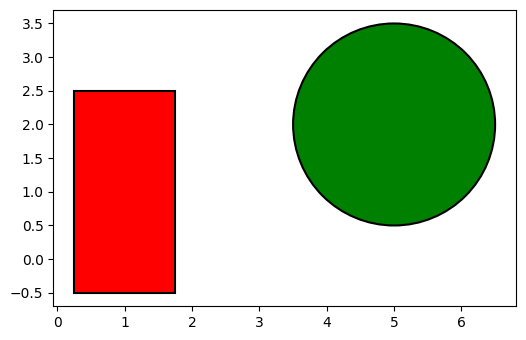

In [91]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# create figure and axes
fig, ax = plt.subplots()

# instantiate shapes
c1 = Circle(1.5, 5, 2)
r1 = Rectangle(1.5, 3, 1, 1)

# plot shapes based on type
shapes = [c1, r1]
for shape in shapes:
    if type(shape) == Circle:
        ax.add_patch(patches.Circle((shape.x, shape.y), shape.r, facecolor='green', linewidth = 1.5, edgecolor = 'black'))
    if type(shape) == Rectangle:
        # NOTE rectangle plot puts coords in bottom left, so we need to alter our center-based coords to correspond to shape's bottom left ones
        x_center = shape.x - (shape.w / 2) # removing half of shape's width and height from coords gives us bottom left coords
        y_center = shape.y - (shape.h / 2)
        ax.add_patch(patches.Rectangle((x_center, y_center), shape.w, shape.h, facecolor='red', linewidth=1.5, edgecolor='black'))

ax.set_aspect(1) # avoid squished look by setting aspect to 1
ax.autoscale() # NOTE autoscale solves rescaling of axis without using xlim, ylim

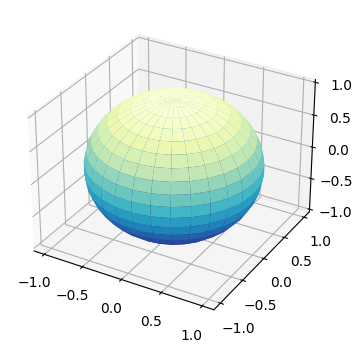

In [55]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)
plt.show()